## Digit Recognition using CNN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
model= tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', ),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

In [ ]:
model.save('./model/cnn_digit.keras')

In [ ]:
model= tf.keras.models.load_model('./model/cnn_digit.keras')

predict= model.predict(x_test[1].reshape(1,28,28))

label= np.argmax(predict)
print(label)

plt.imshow(x_test[1])

In [30]:
def convert_pil_to_grayscale(image):
    """
    Converts a PIL image to grayscale only if it's not already.
    """
    if image.mode != 'L':  # 'L' mode is grayscale in PIL
        image = image.convert('L')
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3


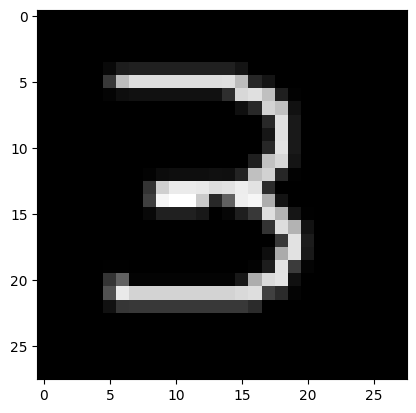

In [36]:
from PIL import Image,ImageOps

img= Image.open('./samples/n3.png').convert('L')
# img= convert_pil_to_grayscale(img)
img= img.resize((28,28))
img= ImageOps.invert(img)
img_arr= np.array(img)/255

img_arr= img_arr.reshape(1,28,28)

predict= model.predict(img_arr)

label= np.argmax(predict)

print(label)
plt.imshow(img_arr.reshape(28,28,1),cmap='gray')